# Create a QComponent - Basic

Now that you have become familiar with Qiskit Metal and feel comfortable using the available aspects and functionality, the next step is learning how to make your own circuit component in Metal.

We will start off by going over the sample `my_qcomponent` in `qiskit_metal>qlibrary>user_components` as a basis, which we will walk through below.

## Reviewing my_qcomponent

In [1]:
# -*- coding: utf-8 -*-

# This code is part of Qiskit.
#
# (C) Copyright IBM 2017, 2021.
#
# This code is licensed under the Apache License, Version 2.0. You may
# obtain a copy of this license in the LICENSE.txt file in the root directory
# of this source tree or at http://www.apache.org/licenses/LICENSE-2.0.
#
# Any modifications or derivative works of this code must retain this
# copyright notice, and modified files need to carry a notice indicating
# that they have been altered from the originals.

Always be sure to include the proper copyright and license information, and give yourself credit for any components you create!

In [2]:
from qiskit_metal import draw, Dict
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent

Import any classes or functions you will be wanting to use when creating your component. The geometries in Metal are shapely objects, which can be readily generated and manipulated through functions in `draw`. Mathematical functions can be accessed via `math_and_overrides`. Any imports that are part of the Metal requirement list can also be used.

The key import is what the parent class of your new component will be. For this example, we are using `QComponent` as the parent for `MyQComponent`, which is the base component class in Metal and contains a great deal of automated functionality. All component hierarchy must have QComponent as the top base class.

In [3]:
dir(QComponent)

['TOOLTIP',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__i_am_component__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_to_design',
 '_check_pin_inputs',
 '_delete_evaluation',
 '_gather_all_children_metadata',
 '_gather_all_children_options',
 '_get_specific_table_values_from_renderers',
 '_get_table_values_from_renderers',
 '_get_unique_class_name',
 '_is_name_used',
 '_register_class_with_design',
 'add_dependency',
 'add_pin',
 'add_qgeometry',
 'class_name',
 'component_metadata',
 'connect_components_already_in_design',
 'default_options',
 'delete',
 'design',
 'get_pin',
 'get_template_options',
 'id',
 'logger',
 'make',
 'name',
 'options',
 'parse_options',
 'parse_value',
 'pin_names',
 

`MyQComponent` creates a simple rectangle of a variable width, height, position and orientation.

In [4]:
class MyQComponent(QComponent):
    """
    Use this class as a template for your components - have fun
    
    Description:
    
    Options:
    """

    # Edit these to define your own tempate options for creation
    # Default drawing options
    default_options = Dict(width='500um',
                           height='300um',
                           pos_x='0um',
                           pos_y='0um',
                           orientation='0',
                           layer='1')
    """Default drawing options"""

    # Name prefix of component, if user doesn't provide name
    component_metadata = Dict(short_name='component',
                             _qgeometry_table_poly='True')
    """Component metadata"""
    
    def make(self):
        """Convert self.options into QGeometry."""

        p = self.parse_options()  # Parse the string options into numbers

        # EDIT HERE - Replace the following with your code
        # Create some raw geometry
        # Use autocompletion for the `draw.` module (use tab key)
        rect = draw.rectangle(p.width, p.height, p.pos_x, p.pos_y)
        
        rect = draw.rotate(rect, p.orientation)
        rect = draw.translate(rect,p.pos_x,p.pos_y)
        
        geom = {'my_polygon': rect}
        self.add_qgeometry('poly', geom, layer=p.layer, subtract=False)

The docstring at the start of the class should clearly explain what the component is, what the parameterized values of the component refer to (in a sense the 'inputs'), and any other information you believe would be relevant for a user making use of your component.

`default_options` is a dictionary to be included in the class of all components. The keywords, of type string, in the default dictionary are the parameters the front-end user is allowed to modify. The keywords in the above indicate that the width and height can be modified via the components options, but have a default value of 500um and 300 um respectively. Further, the position and orientation can also be changed. The `layer` is an expected keyword in a default dictionary, as it is used by renderers to help determine further properties of the `qgeometry` of the component when rendered, eg. GDS QRenderer uses the layer # to define which layer the qgeometry is on.

`component_metadata` is a dictionary which contains some important pieces of information, such as the default/shorthand name of the component (`short_name`), or indicating what types of qgeometry tables are included in this component, eg. `_qgeometry_table_poly='True'`.
The `component_metadata` must contain the flags for each type of qgeometry table being used via `add_qgeometry` methods at the end of the `make()` function, in order for renderer options to be updated correctly. Currently the options are:

`_qgeometry_table_path='True'`

`_qgeometry_table_poly='True'`

`_qgeometry_table_junction='True'`


The `make()` method is where the actual generation of the component's layout is written. 

### The make() method

Although not required, a good first line is `p = self.parse_options()` to cut down on your amount of typing. The `parse_options()` translates the keywords in `self.options` from strings into their appropriate value with respect to the prefix included, e.g.,`p.width`=> "500um" -> 0.0005

Following this, all code generating the shapely geometries that are to represent your circuit layout should be written, via the `draw` module or even written in directly. It is a good practice to play around with the geometries in a jupyter notebook first for quick visual feedback, such as:

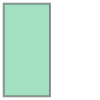

In [5]:
draw.rectangle(1,2,0,0)

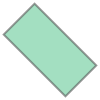

In [6]:
draw.rotate(draw.rectangle(1,2,0,0), 45)

Or for a little more complexity:

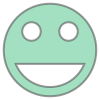

In [7]:
face = draw.shapely.geometry.Point(0, 0).buffer(1)
eye = draw.shapely.geometry.Point(0, 0).buffer(0.2)
eye_l = draw.translate(eye, -0.4, 0.4)
eye_r = draw.translate(eye, 0.4, 0.4)

smile = draw.shapely.geometry.Point(0, 0).buffer(0.8)
cut_sq = draw.shapely.geometry.box(-1, -0.3, 1, 1)
smile = draw.subtract(smile, cut_sq)
face = draw.subtract(face, smile)
face = draw.subtract(face, eye_r)
face = draw.subtract(face, eye_l)
face

Once you are happy with your geometries, and have them properly parameterized to allow the Front End User as much customization of your component as you wish, it is time to convert the geometries into Metal `qgeometries` via `add_qgeometry`

#### add_qgeometry

In [8]:
import qiskit_metal as metal
?metal.qlibrary.core.QComponent.add_qgeometry

`add_qgeometry` is the method by which the shapely geometries you have drawn are converted into Metal qgeometries, the format which allows for the easy translatability between different renderers and the variable representation of quantum elements such as Josephson junctions.

Currently there are three kinds of qgeometries, `path`, `poly` and `junction`.
`path` -> shapely LineString
`poly` -> any other shapely geometry (currently)
`junction` -> shapely LineString

Both `path` and `junction` also take and input of `width`, with is added to the qgeometry table to inform renderers of, as an example, how much to buffer the LineString of a cpw transmission line to turn it into a proper 2D sheet.

`subtract` indicates this qgeometry is to be subtracted from the ground plane of that layer#. A ground plane is automatically included for that layer at the dimension of the chip size if any qgeometry has `subtract = True`. As an example, a cpw transmission line's dielectric gap could be drawn by using the same LineString as previously, having the `width = cpw_width + 2*cpw_gap` and setting `subtract = True`.

`fillet` is an option that informs a renderer that the vertices of this qgeometry are to be filleted by that value (eg. `fillet = "100um"`). 

#### add_pin

In [9]:
?metal.qlibrary.core.QComponent.add_pin

The final step for creating your QComponent is adding of pins. This is not necessarily a requirement for your component, but to have full functionality with Metal and be able to make use of auto-routing components with it, you will want to indicate where the "ports" of your component are.

Following from the above docstring, pins can be added from two coordinates indicating either an orthogonal vector to the port plane of your component, or a tangent to the port plane of your component. For the former, you want the vector to be pointing to the middle point of your intended plane, with the latter being across the length of your intended plane (as indicated in the above figure). The `width` should be the size of the plane (say, in the case of a CPW transmission line, the trace width), with the `gap` following the same logic (though this value can be ignored for any non-coplanar structure). 

## Example



Below is a simple QComponent that implements everything we have reviewed.

In [10]:
from qiskit_metal import draw, Dict
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent

class MySimpleGapCapacitor(QComponent):
    """
    Inherits 'QComponent' class.
    
    Description:
        A simple CPW style gap capacitor, with endcap islands each coupled to their own
        cpw transmission line that ends in a pin.
    
    Options:
        * cpw_width: width of the cpw trace of the transmission line
        * cpw_gap: dielectric gap of the cpw transmission line
        * cap_width: width of the gap capacitor (size of the charge islands)
        * cap_gap: dielectric space between the two islands
        * pos_x/_y: position of the capacitor on chip
        * orientation: 0-> is parallel to x-axis, with orientation (in degrees) counterclockwise.
        * layer: the layer number for the layout 
        
    
    """

    # Edit these to define your own tempate options for creation
    # Default drawing options
    default_options = Dict(cpw_width='15um',
                           cpw_gap='9um',
                           cap_width='35um',
                           cap_gap='3um',
                           pos_x='0um',
                           pos_y='0um',
                           orientation='0',
                           layer='1')
    """Default drawing options"""

    # Name prefix of component, if user doesn't provide name
    component_metadata = Dict(short_name='component', 
                             _qgeometry_table_poly='True',
                             _qgeometry_table_path='True')
    """Component metadata"""
    
    def make(self):
        """Convert self.options into QGeometry."""

        p = self.parse_options()  # Parse the string options into numbers

        pad = draw.rectangle(p.cpw_width, p.cap_width, 0, 0)
        pad_left = draw.translate(pad,-(p.cpw_width+p.cap_gap)/2,0)
        pad_right = draw.translate(pad,(p.cpw_width+p.cap_gap)/2,0)
        pad_etch = draw.rectangle(2*p.cpw_gap+2*p.cpw_width+p.cap_gap,2*p.cpw_gap+p.cap_width)
        cpw_left = draw.shapely.geometry.LineString([[-(p.cpw_width+p.cap_gap/2),0],[-(p.cpw_width*3 +p.cap_gap/2),0]])
        cpw_right = draw.shapely.geometry.LineString([[(p.cpw_width+p.cap_gap/2),0],[(p.cpw_width*3 +p.cap_gap/2),0]])
        
        geom_list = [pad_left,pad_right,cpw_left,cpw_right,pad_etch]
        geom_list = draw.rotate(geom_list,p.orientation)
        geom_list = draw.translate(geom_list,p.pos_x,p.pos_y)
        [pad_left,pad_right,cpw_left,cpw_right,pad_etch] = geom_list

        self.add_qgeometry('path', {'cpw_left':cpw_left, 'cpw_right':cpw_right}, layer=p.layer, width = p.cpw_width)
        self.add_qgeometry('path', {'cpw_left_etch':cpw_left, 'cpw_right_etch':cpw_right}, layer=p.layer, width = p.cpw_width+2*p.cpw_gap, subtract=True)
        self.add_qgeometry('poly', {'pad_left':pad_left, 'pad_right':pad_right}, layer=p.layer)
        self.add_qgeometry('poly', {'pad_etch':pad_etch}, layer=p.layer, subtract=True)
        
        self.add_pin('cap_left', cpw_left.coords, width = p.cpw_width, gap = p.cpw_gap, input_as_norm=True)
        self.add_pin('cap_right', cpw_right.coords, width = p.cpw_width, gap = p.cpw_gap, input_as_norm=True)

In [11]:
design = metal.designs.DesignPlanar()

gui = metal.MetalGUI(design)

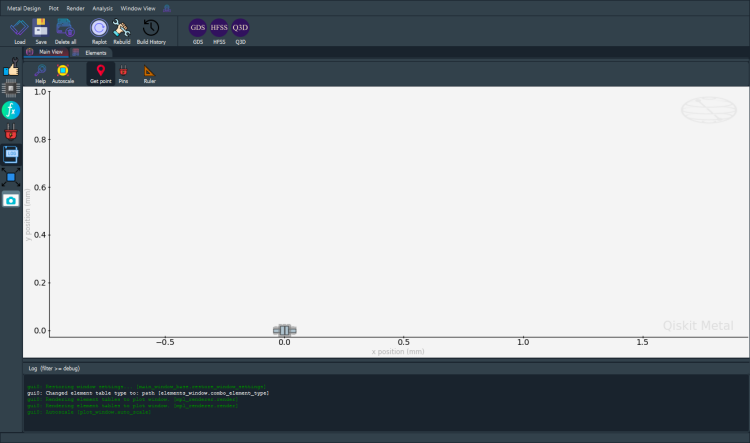

In [12]:
my_cap = MySimpleGapCapacitor(design,'my_cap')
gui.rebuild()
gui.autoscale()
gui.screenshot()

You should now see *my_cap* in the Metal gui. One can work on the layout of the component through these cells by changing the above class, such as how the parameterized values are used. By enabling `overwrite_enabled` (which should normally be kept to False), the code can quickly be iterated through until you, the component designer, is happy with the qcomponent you have just created.

In [13]:
design.overwrite_enabled = True

We will delve into more complex QComponent topics in the next notebook, `Creating a QComponent - Advanced` </br>

Use the command below to close Metal GUI.

In [14]:
gui.main_window.close()

True